<a href="https://colab.research.google.com/github/sberniz/DS-Unit-4-Sprint-1-NLP/blob/main/module1-text-data/LS_DS_411_Text_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Pip installation
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=5eef85a628f91dcc12d77d39171439acd0bfb60732cb3a82be24a63e4c2403da
  Stored in directory: /tmp/pip-ephem-wheel-cache-h7dzhl1e/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [7]:
!pip install squarify

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

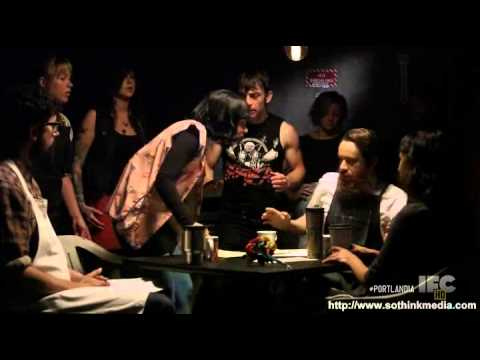

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [5]:
%pwd

'/content'

In [8]:
# Start here 
# Imports and NLP Pre Trained Model 

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_sm")


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [222]:
# Dataset loading

url = "https://raw.githubusercontent.com/DS-17/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [223]:
# Change Start Rating to floats for numerical calculations
shops['star_rating'] = shops['star_rating'].str[:2].astype(float)
shops['star_rating'].dtypes

dtype('float64')

In [224]:
# Full Review Text Data Cleaning Remove Date from text
#Function remove punctuations and dates 
def clean(sample):
  sample = sample[11:]
  sample = re.sub('[^a-zA-Z 0-9]', '', sample)
  return sample


In [225]:
shops['full_review_text'] = shops['full_review_text'].apply(clean)

In [226]:
# Spacy Raw Text Process sample Try 
sample = """
Natural Language Processing Summary
The field of study that focuses on the interactions between human language and computers is called Natural Language Processing, or NLP for short. It sits at the intersection of computer science, artificial intelligence, and computational linguistics (Wikipedia).

“Nat­ur­al Lan­guage Pro­cessing is a field that cov­ers com­puter un­der­stand­ing and ma­nip­u­la­tion of hu­man lan­guage, and it’s ripe with pos­sib­il­it­ies for news­gath­er­ing,” Anthony Pesce said in Natural Language Processing in the kitchen. “You usu­ally hear about it in the con­text of ana­lyz­ing large pools of legis­la­tion or other doc­u­ment sets, at­tempt­ing to dis­cov­er pat­terns or root out cor­rup­tion.”
"""


In [227]:
doc = nlp(sample)

In [228]:
shops.head(1)

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,1 checkin Love love loved the atmosphere Ever...,5.0


In [229]:
tokens = []

for doc in nlp.pipe(shops['full_review_text']):
    
    doc_tokens = []
    
    for token in doc: 
        
        doc_tokens.append(token.text)
    
    tokens.append(doc_tokens)

In [230]:
shops['tokens'] = tokens
shops['tokens'].tail()

7611    [I, actually, step, into, this, restaurant, by...
7612    [Ok, The, Steeping, Room, IS, awesome, How, do...
7613    [Loved, coming, here, for, tea, and, the, atmo...
7614    [he, food, is, just, average, The, booths, did...
7615    [I, finally, stopped, in, for, lunch, with, my...
Name: tokens, dtype: object

In [231]:
shops['tokens'].tail()

7611    [I, actually, step, into, this, restaurant, by...
7612    [Ok, The, Steeping, Room, IS, awesome, How, do...
7613    [Loved, coming, here, for, tea, and, the, atmo...
7614    [he, food, is, just, average, The, booths, did...
7615    [I, finally, stopped, in, for, lunch, with, my...
Name: tokens, dtype: object

In [232]:
# Count Function
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [233]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
4,the,6521,27893,1.0,0.034550,0.034550,0.856224
67,and,6813,25913,2.0,0.032097,0.066647,0.894564
2,I,5778,23587,3.0,0.029216,0.095863,0.758666
33,a,6184,22133,4.0,0.027415,0.123279,0.811975
68,,5633,20458,5.0,0.025340,0.148619,0.739627


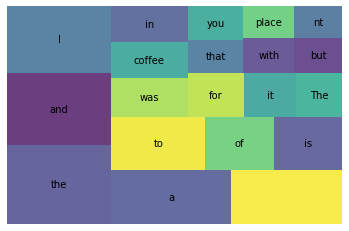

In [234]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [235]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in nlp.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

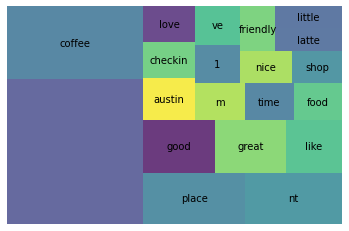

In [236]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [237]:
STOP_WORDS = nlp.Defaults.stop_words.union(['I','in','you','place','nt','coffee','that','with','but','and','was','for','it','The','to','of','is','the','a',' ','check in'])

In [238]:
tokens = []

for doc in nlp.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if (token.is_punct == False) & (token.text.lower() not in STOP_WORDS):
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [239]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
168,good,2777,3958,1.0,0.011386,0.011386,0.364627
67,great,2807,3875,2.0,0.011148,0.022534,0.368566
167,like,2124,3088,3.0,0.008884,0.031418,0.278887
45,austin,1788,2252,4.0,0.006479,0.037896,0.234769
6,checkin,1960,1966,5.0,0.005656,0.043552,0.257353


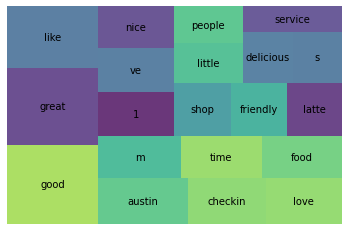

In [240]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [293]:
def get_lemmas(text):
  STOP_WORDS = nlp.Defaults.stop_words.union(['got','austin','s','ve','m','tea','latte','Austin','place','not','be','is','shop','i','in','you','place','nt','coffee','that','with','but','and','was','for','it','The','to','of','is','the','a',' ','check in'])
  lemmas = []
  doc = nlp(text)
  for token in doc: 
    if ((token.text.lower() not in STOP_WORDS) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
      lemmas.append(token.lemma_)
    
  return lemmas

In [242]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

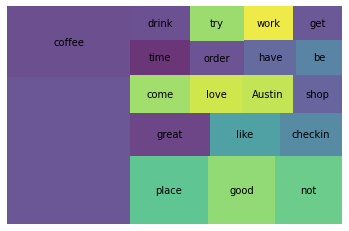

In [243]:
wc = count(shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [244]:
def remove_checkin(series):
  if series[1] == 'checkin':
    series = series[2:]
  else:
    series = series
  return series

In [245]:
shops['tokens'].apply(remove_checkin)

0       [love, love, loved, atmosphere, corner, shop, ...
1       [listed, date, night, austin, ambiance, austin...
2       [listed, brunch, spots, loved, eclectic, homey...
3       [cool, decor, good, drinks, nice, seating, ove...
4       [located, northcross, mall, shopping, center, ...
                              ...                        
7611    [actually, step, restaurant, chance, favorites...
7612    [ok, steeping, room, awesome, great, menu, ite...
7613    [loved, coming, tea, atmosphere, pretty, fresh...
7614    [food, average, booths, feel, clean, waitstaff...
7615    [finally, stopped, lunch, colleague, m, glad, ...
Name: tokens, Length: 7616, dtype: object

In [264]:
def fix_string(string):
  string = string.split(' ',3)
  if (string[2] == 'checkin') | (string[2] == 'checkins'):
    return ' '.join(string[3:])
  elif (string[1] == 'checkin') | (string[1] == 'checkins'):
    return ' '.join(string[2:])
  elif (string[0] == ''):
    return ' '.join(string[1:])
  else:
    return ' '.join(string)
  


In [267]:
shops['full_review_text'] = shops['full_review_text'].apply(fix_string)
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
0,The Factory - Cafe With a Soul,Love love loved the atmosphere Every corner of...,5.0,"[1, checkin, love, love, loved, atmosphere, co...","[ , 1, checkin, Love, love, love, atmosphere, ..."
1,The Factory - Cafe With a Soul,Listed in Date Night Austin Ambiance in Austin...,4.0,"[listed, date, night, austin, ambiance, austin...","[list, Date, Night, Austin, Ambiance, Austin, ..."
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclectic an...,4.0,"[1, checkin, listed, brunch, spots, loved, ecl...","[ , 1, checkin, list, Brunch, Spots, love, ecl..."
3,The Factory - Cafe With a Soul,Very cool decor Good drinks Nice seating Howe...,2.0,"[cool, decor, good, drinks, nice, seating, ove...","[ , cool, decor, good, drink, nice, seating, ..."
4,The Factory - Cafe With a Soul,They are located within the Northcross mall sh...,4.0,"[1, checkin, located, northcross, mall, shoppi...","[1, checkin, locate, Northcross, mall, shoppin..."


In [289]:
#Stop words customs

STOP_WORDS = nlp.Defaults.stop_words.union(['got','austin','s','ve','m','tea','latte','Austin','place','not','be','is','shop','i','in','you','place','nt','coffee','that','with','but','and','was','for','it','The','to','of','is','the','a',' ','check in'])

In [281]:
# Final Tokens with custom stopwords
tokens = []

for doc in nlp.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if (token.is_punct == False) & (token.text.lower() not in STOP_WORDS):
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [284]:
shops['tokens']

0       [love, love, loved, atmosphere, corner, style,...
1       [listed, date, night, ambiance, beautiful, lov...
2       [listed, brunch, spots, loved, eclectic, homey...
3       [cool, decor, good, drinks, nice, seating, ove...
4       [located, northcross, mall, shopping, center, ...
                              ...                        
7611    [actually, step, restaurant, chance, favorites...
7612    [ok, steeping, room, awesome, great, menu, ite...
7613    [loved, coming, atmosphere, pretty, fresh, ord...
7614    [food, average, booths, feel, clean, waitstaff...
7615    [finally, stopped, lunch, colleague, glad, del...
Name: tokens, Length: 7616, dtype: object

In [285]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
162,good,2777,3958,1.0,0.011976,0.011976,0.364627
62,great,2807,3875,2.0,0.011725,0.023702,0.368566
161,like,2124,3088,3.0,0.009344,0.033045,0.278887
9,love,1494,1926,4.0,0.005828,0.038873,0.196166
487,time,1469,1884,5.0,0.005701,0.044574,0.192883


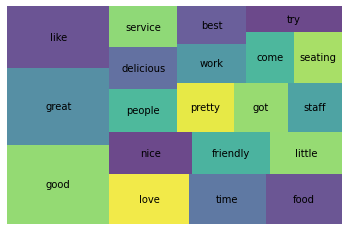

In [286]:
wc = count(shops['tokens'])
wc.head()
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [294]:
#Good Lemmas
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

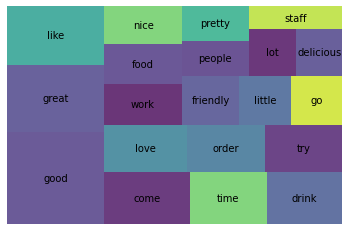

In [295]:
wc = count(shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [296]:
# Overall word Count 
wc_overall = count(shops['lemmas'])
wc_overall.head()


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
162,good,3530,5239,1.0,0.015926,0.015926,0.463498
59,great,2796,3848,2.0,0.011697,0.027623,0.367122
161,like,2259,3351,3.0,0.010187,0.037810,0.296612
447,come,1924,2622,4.0,0.007970,0.045780,0.252626
477,time,1741,2353,5.0,0.007153,0.052933,0.228598


# Counts by ratings

In [301]:
bad_shops = shops[shops['star_rating'] <= 3]
good_shops = shops[shops['star_rating'] > 3]


In [302]:
good_shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
0,The Factory - Cafe With a Soul,Love love loved the atmosphere Every corner of...,5.0,"[love, love, loved, atmosphere, corner, style,...","[love, love, love, atmosphere, corner, style, ..."
1,The Factory - Cafe With a Soul,Listed in Date Night Austin Ambiance in Austin...,4.0,"[listed, date, night, ambiance, beautiful, lov...","[list, Date, Night, Ambiance, BEAUTIFUL, love,..."
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclectic an...,4.0,"[listed, brunch, spots, loved, eclectic, homey...","[list, Brunch, Spots, love, eclectic, homey, p..."
4,The Factory - Cafe With a Soul,They are located within the Northcross mall sh...,4.0,"[located, northcross, mall, shopping, center, ...","[locate, Northcross, mall, shopping, center, f..."
5,The Factory - Cafe With a Soul,Very cute cafe I think from the moment I stepp...,4.0,"[cute, cafe, think, moment, stepped, find, cut...","[cute, cafe, think, moment, step, find, cute, ..."


In [303]:
bad_shops

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
3,The Factory - Cafe With a Soul,Very cool decor Good drinks Nice seating Howe...,2.0,"[cool, decor, good, drinks, nice, seating, ove...","[cool, decor, good, drink, nice, seating, over..."
8,The Factory - Cafe With a Soul,Ok lets try this approach Pros Music Seating ...,3.0,"[ok, lets, try, approach, pros, music, seating...","[ok, let, try, approach, Pros, music, Seating,..."
11,The Factory - Cafe With a Soul,The store has A decoration but honestly the co...,3.0,"[store, decoration, honestly, good, surroundin...","[store, decoration, honestly, good, surround, ..."
12,The Factory - Cafe With a Soul,Listed in 2016 The Third Time is a Charm The ...,3.0,"[listed, 2016, time, charm, factory, decor, in...","[list, 2016, Time, Charm, Factory, decor, inno..."
25,The Factory - Cafe With a Soul,Okay so after visiting my friends in LA and tr...,1.0,"[okay, visiting, friends, la, trying, mint, mo...","[okay, visit, friend, LA, try, mint, mojito, i..."
...,...,...,...,...,...
7582,The Steeping Room,I should probably give this spot 4 stars but t...,3.0,"[probably, spot, 4, stars, main, dish, underwh...","[probably, spot, 4, star, main, dish, underwhe..."
7583,The Steeping Room,Its a lovely little tea and pastry shop but th...,2.0,"[lovely, little, pastry, service, continuously...","[lovely, little, pastry, service, continuously..."
7590,The Steeping Room,So today I tried this place I have been in Aus...,3.0,"[today, tried, september, list, let, start, en...","[today, try, September, list, let, start, entr..."
7600,The Steeping Room,Great service with unimaginative and uneventfu...,2.0,"[great, service, unimaginative, uneventful, fo...","[great, service, unimaginative, uneventful, fo..."


In [304]:
wc_good = count(good_shops['lemmas'])
wc_bad = count(bad_shops['lemmas'])
top20_good = wc_good[wc_good['rank'] <=20]
top20_bad = wc_bad[wc_bad['rank'] <=20]

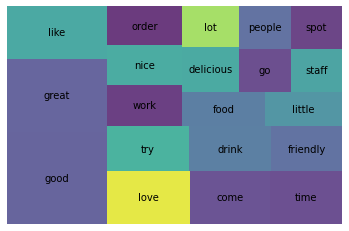

In [306]:
#Top 20 'good' ratings
squarify.plot(sizes=top20_good['pct_total'], label=top20_good['word'], alpha=.8 )
plt.axis('off')
plt.show()

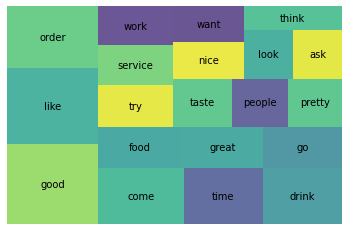

In [307]:
#Top 20 'bad' ratings
squarify.plot(sizes=top20_bad['pct_total'], label=top20_bad['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [309]:
top20_good

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
173,good,2885,4251,1.0,0.016612,0.016612,0.469870
59,great,2450,3385,2.0,0.013228,0.029839,0.399023
199,like,1668,2414,3.0,0.009433,0.039273,0.271661
6,love,1565,2042,4.0,0.007980,0.047252,0.254886
367,come,1473,1973,5.0,0.007710,0.054962,0.239902
369,time,1326,1753,6.0,0.006850,0.061812,0.215961
112,try,1326,1702,7.0,0.006651,0.068463,0.215961
9,drink,1254,1697,8.0,0.006631,0.075095,0.204235
150,friendly,1404,1469,9.0,0.005740,0.080835,0.228664
522,work,1152,1460,10.0,0.005705,0.086541,0.187622


In [ ]:
top20_bad

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
32,good,645,988,1.0,0.013523,0.013523,0.436992
29,like,591,937,2.0,0.012825,0.026348,0.400407
156,order,434,768,3.0,0.010512,0.036860,0.294038
140,come,451,649,4.0,0.008883,0.045743,0.305556
457,time,415,600,5.0,0.008212,0.053955,0.281165
10,drink,358,599,6.0,0.008199,0.062154,0.242547
130,food,308,476,7.0,0.006515,0.068669,0.208672
47,great,346,463,8.0,0.006337,0.075006,0.234417
56,go,338,449,9.0,0.006146,0.081151,0.228997
117,try,338,426,10.0,0.005831,0.086982,0.228997


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [319]:
top10_good = wc_good[wc_good['rank'] <=10]
top10_bad = wc_bad[wc_bad['rank'] <=10]

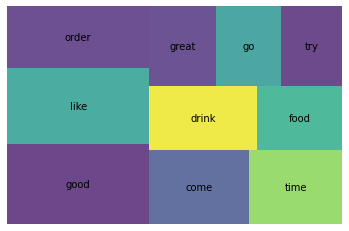

In [322]:
#Top 10 bad
squarify.plot(sizes=top10_bad['pct_total'], label=top10_bad['word'], alpha=.8 )
plt.axis('off')
plt.show()

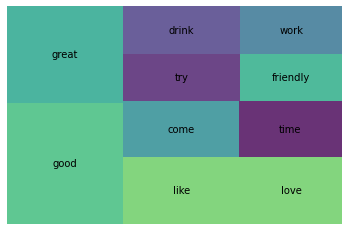

In [323]:
#TOp 10 good 
squarify.plot(sizes=top10_good['pct_total'], label=top20_good['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

